# Fitting models using MCMC, and generating posterior predictions

In [1]:
import os
os.chdir('..')
    # run initially as cd will be the notebook folder otherwise
%load_ext rpy2.ipython
    # warnings about 'quartz' on Windows can be safely ignored.

pal = ["#ffc9b5", "#648767", "#b1ddf1", "#95a7ce", "#987284", "#3d5a80"]
light_pal = ["#ffc9b5", "#b1ddf1", "#987284"]

c:\users\qderc\appdata\local\programs\python\python39\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [41]:
%%R
devtools::load_all()
options(mc.cores = 4) # number of chains to run in parallel

i Loading pstpipeline


## Fit training and test data models

For computational ease, we are going to take a small sample (n=20) of each of our cohorts, as each model otherwise takes >=1 day to run on standard hardware!

In [8]:
%%R
data(pstpipeline::all_res_split)
nd_subsample <- pstpipeline::take_subsample(all_res_split$non_distanced, n_ppts = 20)
dis_subsample <- pstpipeline::take_subsample(all_res_split$distanced, n_ppts = 20)

In [9]:
%%R
head(nd_subsample$ppt_info)

# A tibble: 6 x 78
  subjID   sessionID  studyID  distanced exclusion final_block_AB final_block_CD
  <chr>    <chr>      <chr>    <lgl>         <dbl>          <dbl>          <dbl>
1 5c5cad3~ 608920632~ 608013c~ FALSE             0           0.9            0.65
2 5a9d6bc~ 60891b115~ 6080132~ FALSE             0           0.4            0.5 
3 57f9238~ 6091028f8~ 6080057~ FALSE             0           1              0.8 
4 5bb7b83~ 609103069~ 6080103~ FALSE             0           1              1   
5 5fa1625~ 609103388~ 6080103~ FALSE             0           0.95           0.95
6 56ce42d~ 609103101~ 6080103~ FALSE             0           0.9            0.75
# ... with 71 more variables: final_block_EF <dbl>, total_points <int>,
#   total_time_taken <dbl>, keypress_percent <dbl>, mean_rt <dbl>,
#   digit_span <int>, catch_question_1 <lgl>, catch_question_2 <lgl>,
#   catch_question_3 <lgl>, catch_question_4 <lgl>, sex <chr>, age <int>,
#   gender <chr>, ethnicity <chr>, ses <int>, inco

### Training models

#### 2 learning rates

In [10]:
%%R
subset_mcmc_2a_train_nd <- pstpipeline::fit_learning_model(
    nd_subsample, model = "2a", exp_part = "training", vb = FALSE, save_model_as = "fit_pst_2a_nd_subsamp", 
    outputs = c("raw_df", "stan_datalist", "summary", "draws_list", "loo_obj", "diagnostics"),
    refresh = 0, iter_warmup = 1000, iter_sampling = 2000, adapt_delta = 0.9, step_size = 1, 
    max_treedepth = 10, font_size = 11, font = "Open Sans"
);
subset_mcmc_2a_train_dis <- pstpipeline::fit_learning_model(
    dis_subsample, model = "2a", exp_part = "training", vb = FALSE, save_model_as = "fit_pst_2a_dis_subsamp", 
    outputs = c("raw_df", "stan_datalist", "summary", "draws_list", "loo_obj", "diagnostics"),
    refresh = 0, iter_warmup = 1000, iter_sampling = 2000, adapt_delta = 0.9, step_size = 1, 
    max_treedepth = 10, font_size = 11, font = "Open Sans"
);

R[write to console]: The C++ toolchain required for CmdStan is setup properly!

R[write to console]: Compiling Stan program...



R[write to console]: Getting initial values from variational inference...



Finished in  7.9 seconds.
Running MCMC with 4 parallel chains...

Chain 3 finished in 817.5 seconds.
Chain 4 finished in 823.3 seconds.
Chain 2 finished in 862.0 seconds.
Chain 1 finished in 866.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 842.3 seconds.
Total execution time: 866.5 seconds.
Processing csv files: C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222226-1-98bcbf.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222226-2-98bcbf.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222226-3-98bcbf.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222226-4-98bcbf.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
N

R[write to console]: The C++ toolchain required for CmdStan is setup properly!

R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  8.7 seconds.
Running MCMC with 4 parallel chains...

Chain 2 finished in 868.3 seconds.
Chain 4 finished in 872.1 seconds.
Chain 1 finished in 875.3 seconds.
Chain 3 finished in 906.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 880.5 seconds.
Total execution time: 906.4 seconds.
Processing csv files: C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222241-1-427cad.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222241-2-427cad.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222241-3-427cad.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_gainloss_Q_training-202110222241-4-427cad.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
N

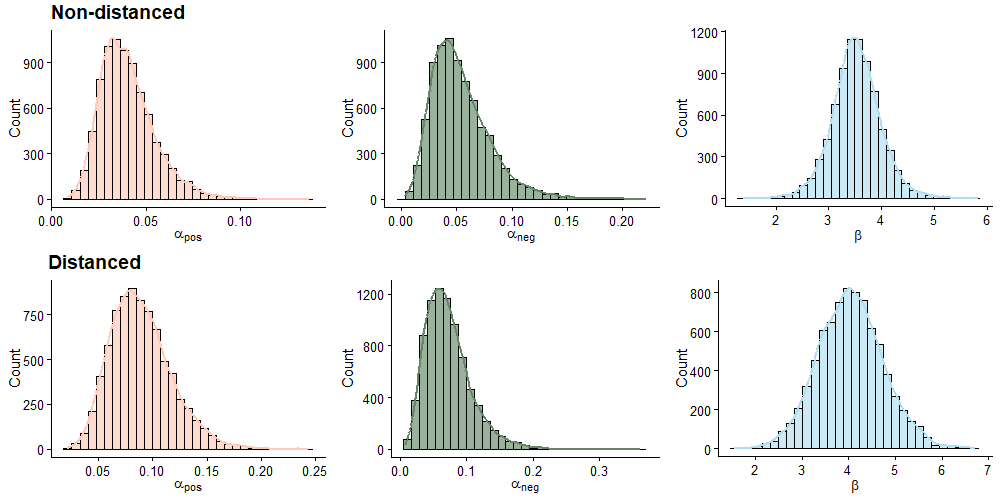

In [28]:
%%R -w 10 -h 5 --units in -r 100
cowplot::plot_grid(
    cowplot::ggdraw() + cowplot::draw_label("Non-distanced", hjust = 3.35, fontface = "bold", size = 14, fontfamily = "Open Sans"),
    subset_mcmc_2a_train_nd$model_checks$mu_par_dens,
    cowplot::ggdraw() + cowplot::draw_label("Distanced", hjust = 4.85, fontface = "bold", size = 14, fontfamily = "Open Sans"),
    subset_mcmc_2a_train_dis$model_checks$mu_par_dens,
    nrow = 4,
    rel_heights = c(0.1, 1, 0.1, 1)
)

These are the posterior distributions for the group-level means of the three free parameters.

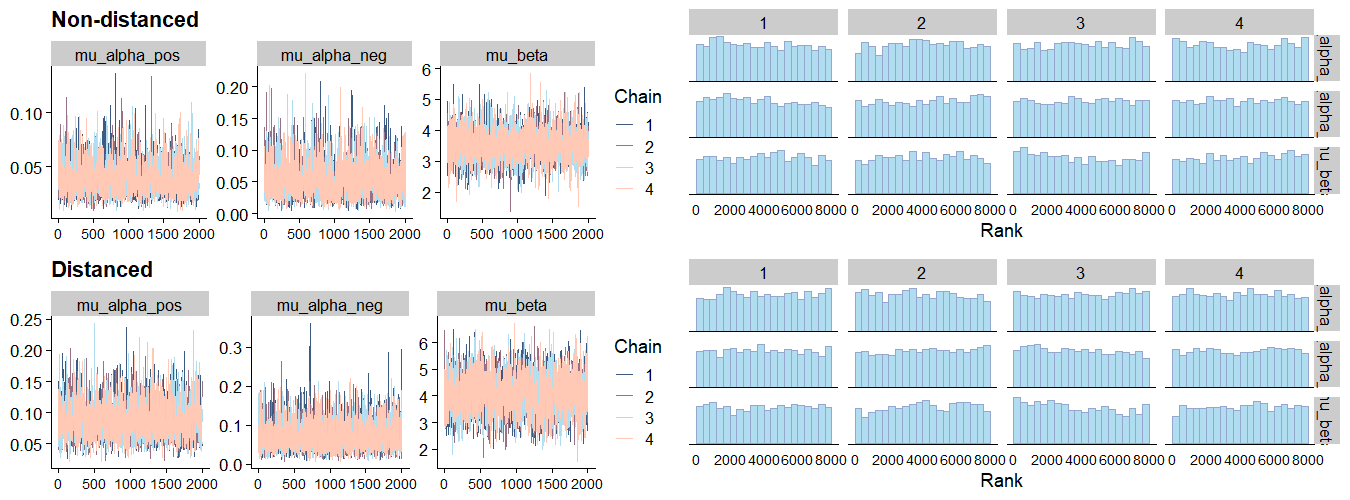

In [29]:
%%R -w 13.5 -h 5 --units in -r 100
cowplot::plot_grid(
    subset_mcmc_2a_train_nd$model_checks$diagnostics$trace + 
        ggplot2::ggtitle("Non-distanced") + 
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)), 
    subset_mcmc_2a_train_nd$model_checks$diagnostics$rank_hist +
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)),
    subset_mcmc_2a_train_dis$model_checks$diagnostics$trace + 
        ggplot2::ggtitle("Distanced") +
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)), 
    subset_mcmc_2a_train_dis$model_checks$diagnostics$rank_hist + 
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)),
    nrow = 2,
    ncol = 2
)

Traces should look like "hairy caterpillars", and rank histograms should all be approximately uniformly distributed (here, it may be that we should do more sampling/warm-up iterations). Next, we want to see how well the fitted model parameters predict the observed data, by sampling from the posterior.

In [42]:
%%R
fit_nd_2a <- readRDS("outputs/cmdstan/fit_pst_2a_nd_subsamp_mcmc_8000.RDS")
data_list_nd_2a <- readRDS("outputs/cmdstan/fit_pst_2a_nd_subsamp_stan_datalist.RDS")

subset_gq_2a_train_nd <- pstpipeline::generate_posterior_quantities(
    fit_mcmc = fit_nd_2a, data_list = data_list_nd_2a, save_model_as = "fit_pst_2a_nd_subsamp", return_type = "paths"
)

R[write to console]: Model executable is up to date!



Running standalone generated quantities after 4 MCMC chains, all chains in parallel ...

Chain 3 finished in 0.0 seconds.
Chain 1 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 22.5 seconds.


In [43]:
%%R
subset_gq_2a_train_nd

[1] "outputs/cmdstan/fit_pst_2a_nd_subsamp_gq_chain_1.csv"
[2] "outputs/cmdstan/fit_pst_2a_nd_subsamp_gq_chain_2.csv"
[3] "outputs/cmdstan/fit_pst_2a_nd_subsamp_gq_chain_3.csv"
[4] "outputs/cmdstan/fit_pst_2a_nd_subsamp_gq_chain_4.csv"


In [46]:
%%R
fit_dis_2a <- readRDS("outputs/cmdstan/fit_pst_2a_dis_subsamp_mcmc_8000.RDS")
data_list_dis_2a <- readRDS("outputs/cmdstan/fit_pst_2a_dis_subsamp_stan_datalist.RDS")

subset_gq_2a_train_nd <- pstpipeline::generate_posterior_quantities(
    fit_mcmc = fit_dis_2a, data_list = data_list_dis_2a, save_model_as = "fit_pst_2a_dis_subsamp", return_type = "paths"
)

R[write to console]: Model executable is up to date!



Running standalone generated quantities after 4 MCMC chains, all chains in parallel ...

Chain 1 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 14.7 seconds.


#### 1 learning rate

In [47]:
%%R
subset_mcmc_1a_train_nd <- pstpipeline::fit_learning_model(
    nd_subsample, exp_part = "training", model = "1a", vb = FALSE, save_model_as = "fit_pst_1a_nd_subsamp",
    outputs = c("raw_df", "stan_datalist", "summary", "draws_list", "loo_obj", "diagnostics"),
     refresh = 0, iter_warmup = 1000, iter_sampling = 2000, adapt_delta = 0.9, step_size = 1, 
    max_treedepth = 10, font_size = 11, font = "Open Sans"
);
subset_mcmc_1a_train_dis <- pstpipeline::fit_learning_model(
    dis_subsample, exp_part = "training", model = "1a", vb = FALSE, save_model_as = "fit_pst_1a_dis_subsamp",
    outputs = c("raw_df", "stan_datalist", "summary", "draws_list", "loo_obj", "diagnostics"),
     refresh = 0, iter_warmup = 1000, iter_sampling = 2000, adapt_delta = 0.9, step_size = 1, 
    max_treedepth = 10, font_size = 11, font = "Open Sans"
);

R[write to console]: The C++ toolchain required for CmdStan is setup properly!

R[write to console]: Compiling Stan program...



R[write to console]: Getting initial values from variational inference...



Finished in  7.5 seconds.
Running MCMC with 4 parallel chains...

Chain 3 finished in 760.1 seconds.
Chain 4 finished in 768.3 seconds.
Chain 1 finished in 808.1 seconds.
Chain 2 finished in 901.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 809.6 seconds.
Total execution time: 901.9 seconds.
Processing csv files: C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222316-1-8256ed.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222316-2-8256ed.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222316-3-8256ed.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222316-4-8256ed.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Chec

R[write to console]: The C++ toolchain required for CmdStan is setup properly!

R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  8.1 seconds.
Running MCMC with 4 parallel chains...

Chain 1 finished in 847.1 seconds.
Chain 2 finished in 851.7 seconds.
Chain 4 finished in 865.1 seconds.
Chain 3 finished in 920.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 871.0 seconds.
Total execution time: 920.3 seconds.
Processing csv files: C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222332-1-4a62db.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222332-2-4a62db.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222332-3-4a62db.csv, C:/Users/qderc/Documents/Research Work/October 2021/pstpipeline/outputs/cmdstan/pst_Q_training-202110222332-4-4a62db.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Chec

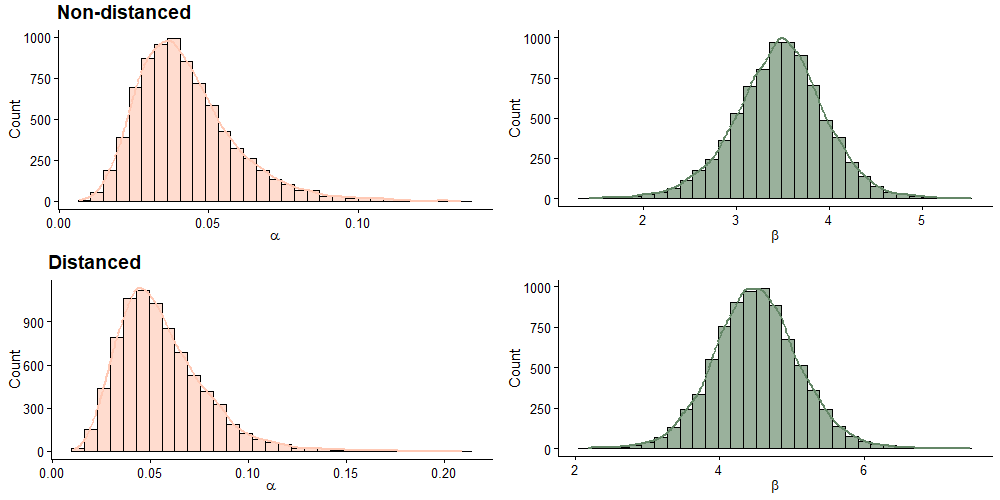

In [51]:
%%R -w 10 -h 5 --units in -r 100
cowplot::plot_grid(
    cowplot::ggdraw() + cowplot::draw_label("Non-distanced", hjust = 3.3, fontface = "bold", size = 14, fontfamily = "Open Sans"),
    subset_mcmc_1a_train_nd$model_checks$mu_par_dens,
    cowplot::ggdraw() + cowplot::draw_label("Distanced", hjust = 4.85, fontface = "bold", size = 14, fontfamily = "Open Sans"),
    subset_mcmc_1a_train_dis$model_checks$mu_par_dens,
    nrow = 4,
    rel_heights = c(0.1, 1, 0.1, 1)
)

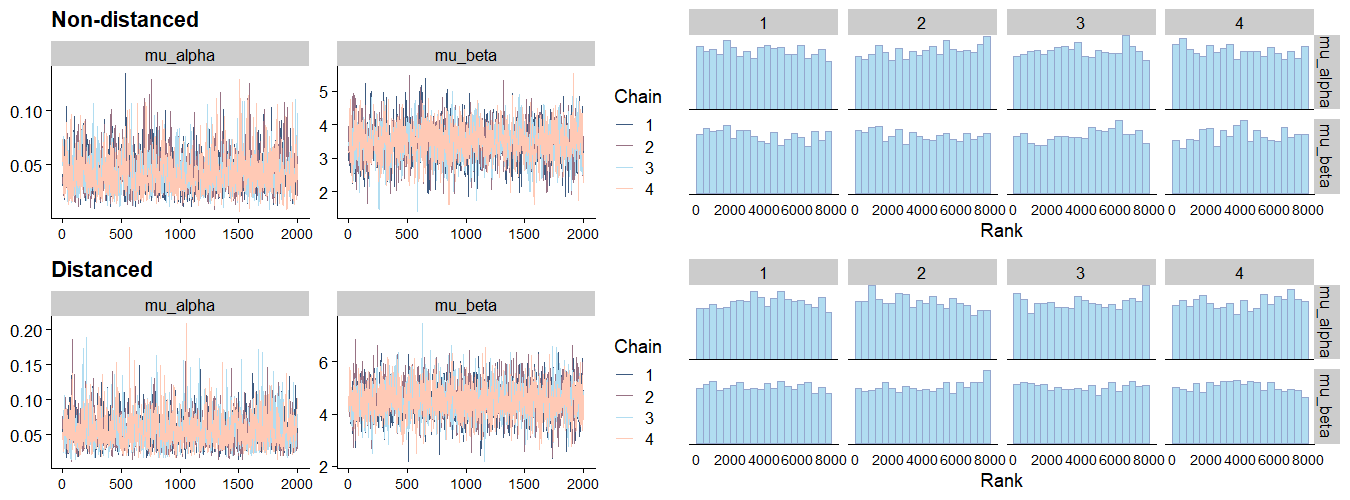

In [52]:
%%R -w 13.5 -h 5 --units in -r 100
cowplot::plot_grid(
    subset_mcmc_1a_train_nd$model_checks$diagnostics$trace + 
        ggplot2::ggtitle("Non-distanced") + 
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)), 
    subset_mcmc_1a_train_nd$model_checks$diagnostics$rank_hist +
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)),
    subset_mcmc_1a_train_dis$model_checks$diagnostics$trace + 
        ggplot2::ggtitle("Distanced") +
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)), 
    subset_mcmc_1a_train_dis$model_checks$diagnostics$rank_hist + 
        ggplot2::theme(axis.text.x = ggplot2::element_text(size = 10)),
    nrow = 2,
    ncol = 2
)

In [54]:
%%R
fit_nd_1a <- readRDS("outputs/cmdstan/fit_pst_1a_nd_subsamp_mcmc_8000.RDS")
data_list_nd_1a <- readRDS("outputs/cmdstan/fit_pst_1a_nd_subsamp_stan_datalist.RDS")

subset_gq_1a_train_nd <- pstpipeline::generate_posterior_quantities(
    fit_mcmc = fit_nd_1a, data_list = data_list_nd_1a, save_model_as = "fit_pst_1a_nd_subsamp", return_type = "paths"
)

R[write to console]: Model executable is up to date!



Running standalone generated quantities after 4 MCMC chains, all chains in parallel ...

Chain 3 finished in 0.0 seconds.
Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 14.4 seconds.


In [56]:
%%R
fit_dis_1a <- readRDS("outputs/cmdstan/fit_pst_1a_dis_subsamp_mcmc_8000.RDS")
data_list_dis_1a <- readRDS("outputs/cmdstan/fit_pst_1a_dis_subsamp_stan_datalist.RDS")

subset_gq_1a_train_nd <- pstpipeline::generate_posterior_quantities(
    fit_mcmc = fit_dis_1a, data_list = data_list_dis_1a, save_model_as = "fit_pst_1a_dis_subsamp", return_type = "paths"
)

R[write to console]: Model executable is up to date!



Running standalone generated quantities after 4 MCMC chains, all chains in parallel ...

Chain 4 finished in 0.0 seconds.
Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 18.6 seconds.
